In [1]:
from math import pi
import torch
import torch.optim
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import scipy.io as io
import copy
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [45]:
width = 8
x = (torch.randint(0,2, (width, width))*2-1)/1
x.requires_grad_(True)
x_0 = copy.deepcopy(x)
xoffset = (torch.rand([width, width])*2-1)

MSELoss = nn.MSELoss()

optimizer = torch.optim.SGD([x,], lr=0.001, momentum=0)
for step in range(20000):
    xtotal=x
    f = torch.mm(xtotal,xtotal.T)
    loss = 4*MSELoss(f, torch.eye(width)) + 1*MSELoss(xtotal.abs(),torch.ones([width,width]))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if step % 5000 == 4999:
        print ('Step {}: {} until orthogonalized'.format(step + 1, loss))

Step 5000: 0.4718973636627197 until orthogonalized
Step 10000: 0.45903265476226807 until orthogonalized
Step 15000: 0.45419126749038696 until orthogonalized
Step 20000: 0.4517346918582916 until orthogonalized


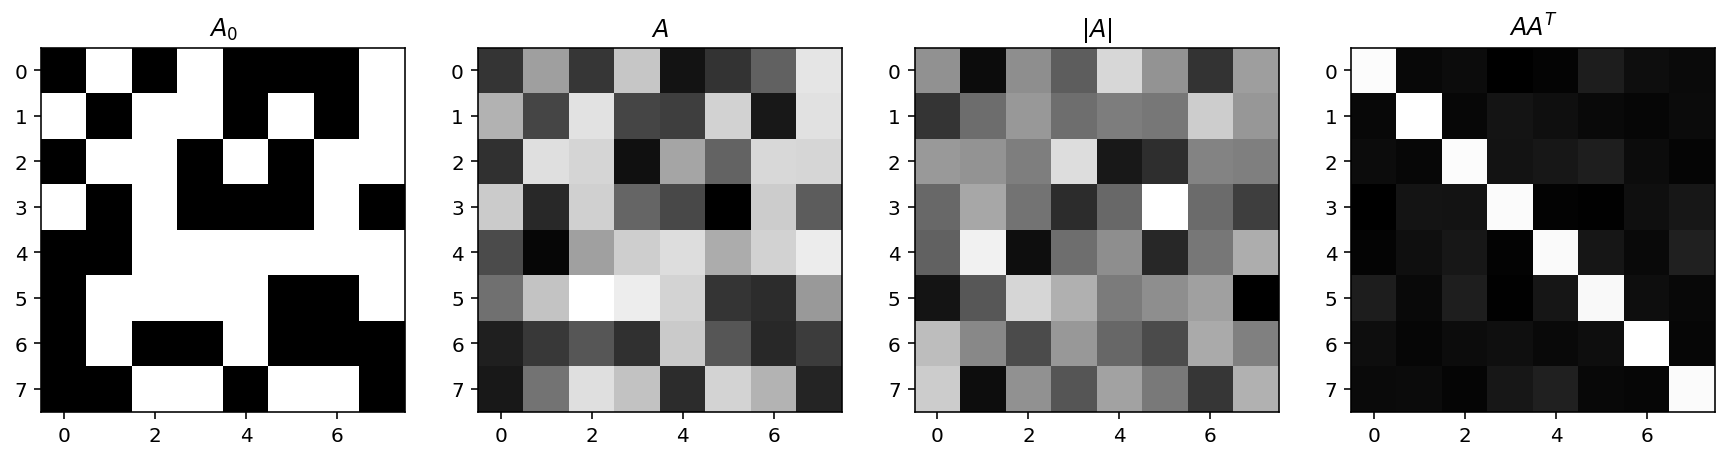

In [46]:
plt.figure(figsize=[15, 5])
plt.subplot(1,4,1)
plt.title(r"$A_0$")
plt.imshow(x_0.detach().numpy(), cmap=plt.cm.gray)
plt.subplot(1,4,2)
plt.title(r"$A$")
plt.imshow(xtotal.detach().numpy(), cmap=plt.cm.gray)
plt.subplot(1,4,3)
plt.title(r"$|A|$")
plt.imshow(xtotal.abs().detach().numpy(), cmap=plt.cm.gray)
plt.subplot(1,4,4)
plt.title(r"$AA^T$")
plt.imshow(f.detach().numpy(), cmap=plt.cm.gray)
plt.show()

#io.savemat("patternGradient8x8.mat", {'pattern': xtotal.detach().numpy()})